<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Edit-Success" data-toc-modified-id="Edit-Success-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Edit Success</a></span></li><li><span><a href="#Perplexity" data-toc-modified-id="Perplexity-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Perplexity</a></span></li><li><span><a href="#L2-Distance" data-toc-modified-id="L2-Distance-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>L2 Distance</a></span></li></ul></div>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

In [2]:

model_100 = pd.read_csv("../eval/edit_success_20210425.20.04.1619408171_self_sample_epoch0_ts10000.20210419.14.04.1618869292")
gpt_100 = pd.read_csv("../eval/edit_success_20210425.21.04.1619409649_gpt2_epoch0_ts10000.20210408.09.04.1617899457")

## Edit Success

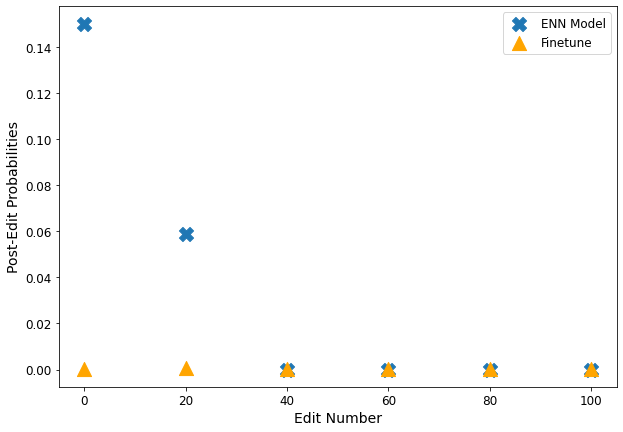

In [5]:
model_100['grouping'] = (
    model_100
    .edit_number
    .apply(lambda x: int(x /20) * 20)
)
ax=(
    model_100
    .query('edit_step == 1')
    .groupby("grouping")
    .logits
    .apply(lambda x: np.mean(np.exp(x)))
    .reset_index()
    .plot(
        kind='scatter', x="grouping",y="logits", 
        marker="X", s=200, figsize=(10,7),
        label="ENN Model"
    )
)


gpt_100['grouping'] = (
    gpt_100
    .edit_number
    .apply(lambda x: int(x /20) * 20)
)
(
    gpt_100
    .query('edit_step == 1')
    .groupby("grouping")
    .logits
    .apply(lambda x: np.mean(np.exp(x)))
    .reset_index()
    .plot(
        kind='scatter', x="grouping",y="logits", 
        color='orange', marker="^", s=200, figsize=(10,7),
        label="Finetune", ax=ax
    )
)

plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Post-Edit Probabilities", fontsize=14)
plt.yticks(fontsize=12)
plt.title("", fontsize=16)
plt.legend(fontsize=12)
plt.savefig('edit_success.png', bbox_inches='tight', facecolor="#ffffff")

## Perplexity

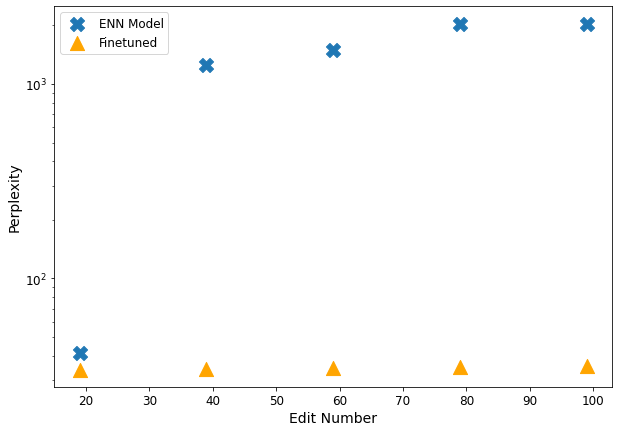

In [7]:
ax = (
   model_100.loc[~model_100.new_ppl.isna()]
    .groupby("edit_number")
    .new_ppl.mean()
    .reset_index()
    .loc[:,["edit_number","new_ppl"]]
    .plot(
        kind='scatter', x="edit_number",y="new_ppl", 
        marker="X", s=200, figsize=(10,7),
        label="ENN Model"
    )
)

(
    gpt_100.loc[~gpt_100.new_ppl.isna()]
    .groupby("edit_number")
    .new_ppl.mean()
    .reset_index()
    .loc[:,["edit_number","new_ppl"]]
    .plot(
        kind='scatter', x="edit_number",y="new_ppl",
        color='orange', marker="^", s=200, 
        label='Finetuned', ax=ax
    )
)
plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Perplexity", fontsize=14)
plt.yticks(fontsize=12)
plt.yscale("log")
plt.title("", fontsize=16)
plt.legend(fontsize=12)
plt.savefig('perplexity.png', bbox_inches='tight', facecolor="#ffffff")

## L2 Distance

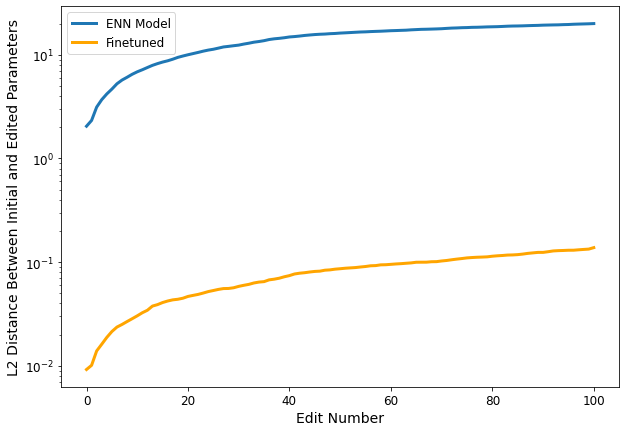

In [4]:
(
    model_100
    .query('edit_step == 1')
    .groupby("edit_number")
    .norm.mean()
    .plot(label="ENN Model", figsize=(10,7), linewidth=3)
)


(
    gpt_100
    .query('edit_step == 1')
    .groupby("edit_number")
    .norm.mean()
    .plot(color='orange', label="Finetuned", linewidth=3)
)

plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("L2 Distance Between Initial and Edited Parameters", fontsize=14)
plt.yticks(fontsize=12)
plt.yscale("log")
plt.legend(fontsize=12)
plt.savefig('l2_distance.png', bbox_inches='tight', facecolor="#ffffff")